In [2]:
!pip install python-louvain

  Running setup.py bdist_wheel for python-louvain: started
  Running setup.py bdist_wheel for python-louvain: finished with status 'done'
  Stored in directory: C:\Users\larsj\AppData\Local\pip\Cache\wheels\c3\b0\db\198c7453d5169907dbdbb090eebc0c6839f75e36b09c6dc7aa
Successfully built python-louvain


You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
from module_update import update


Updated file nbtext.py
Updated file nbpictures.py


In [2]:
update('graph_networkx_louvain')

Updated file graph_networkx_louvain.py


In [3]:
import graph_networkx_louvain as gnl

In [64]:
import networkx as nx

In [4]:
import nbtext as nb

In [5]:
import requests
import pandas as pd

In [6]:
from nbtext import collocation, collocation_data

In [7]:
from nbtext import urn_coll

In [8]:
abrev = nb.get_urn({'title':'%%amerika til%', 'limit':100}) 
abrev

[[2010051906100, '', 'Fra Amerika til Norge', 1992],
 [2007091801006, '', 'Fra Amerika til Norge', 1992],
 [2007112704027, '', 'Fra Amerika til Norge', 1993]]

In [9]:
abrev2 = nb.get_urn({'author':"sunde%rasm%"})
abrev2[1:]

[[2016072248034, 'Sunde, Rasmus', 'stad skal ein vera', 1989],
 [2015082548012, 'Sunde, Rasmus', 'Long Prairie', 1994]]

In [10]:
abrev3 = nb.get_urn({'title':'%%amerika%brev%', 'limit':100}) 
abrev3[:5]

[[2010082403023, 'Evensen, Erik Aalvik', 'Amerika-brevene', 1996],
 [2016052608061, 'Engen, Arnfinn', 'Utvandringshistorie og amerikabrev', 1975],
 [2013041608123, 'Rodegard, Olaf', 'Amerikabrev', 1988],
 [2007030801010, '', 'Amerikabrev', 1958],
 [2014072406038, '', 'Amerikabrev', 1989]]

In [11]:
abrev = abrev + abrev2[1:] + abrev3

In [12]:
dbrev = nb.get_urn({'ddk':'304.8%', 'limit':100})
dbrev

[[2013110608132, 'Flå, Vibeke', 'Utvandring og intern flytting', 1995],
 [2015112708157, 'Standal, Ragnar', 'Mot nye heimland', 1985],
 [2014121108068, '', 'Norwegian-American essays 1996', 1996],
 [2008041804067, 'Semmingsen, Ingrid', 'Veien mot vest', 1950],
 [2008020600020, '', 'Frå Sogn til Amerika', 1994],
 [2011022808164, '', 'Norsk emigrantlitteratur', 2000],
 [2008101004055, '', 'Utvandring til Amerika', 2000],
 [2008012800046,
  'Skretting, Harald',
  'I far sine fotefar - 75 år etter',
  1994],
 [2012061406142, 'Ottosen, Rune', 'Mitt nye hjemland', 1987],
 [2015060508068, '', 'Norsk emigrantlitteratur', 2000],
 [2014071808096, 'Ryningen, Alfred', 'Valle kommune', 2000],
 [2010082403023, 'Evensen, Erik Aalvik', 'Amerika-brevene', 1996],
 [2014022408011, '', 'Eit blidare tilvere?', 1986],
 [2009042104066,
  'Skretting, Harald',
  "In my father's footsteps - 75 years later",
  2000],
 [2008081200101, 'Tjernsberg, Torbjørn', 'Under sydkorset', 1997],
 [2016062308064, 'Kvam, Arne'

In [13]:
dbrev = nb.get_urn({'yearfrom':1850, 'yearto':1940, 'limit':200})
dbrev[:5]

[[2014050805171,
  '',
  'Rapport om elektroniske betalingssystemer i Norden',
  1984],
 [2010111508048, 'Kent, Larry', 'Dødsbåten', 1991],
 [2015091848041, '', 'Vokenatt', 1932],
 [2016012008125,
  'Berntsen, Randi Tønnessen',
  'Kroppsøvingsprosjektet. Rapport nr. 1, Kroppsøving i Norge, Sverige og Danmark',
  1980],
 [2016072609007,
  '',
  'Innstilling om etterutdanning for skoleledere i grunnskolen',
  1974]]

In [14]:
fs = [nb.get_freq(u[0], top=0, cutoff=0) for u in abrev]
from collections import Counter
fsum = Counter()
for f in fs:
    fsum += f



In [15]:
gs = [nb.get_freq(u[0], top=0, cutoff=0) for u in dbrev]
from collections import Counter
dsum = Counter()
for f in gs:
    dsum += f



In [16]:
brev = pd.DataFrame.from_dict(fsum, orient='index')
brev.columns = ['brev']
ref = pd.DataFrame.from_dict(dsum, orient='index')
ref.columns = ['ref']
nb.normalize_corpus_dataframe(brev)
nb.normalize_corpus_dataframe(ref)

True

In [17]:
combo = (brev.join(ref)).fillna(0.8)

In [23]:
pd.DataFrame((combo['brev']**1.06/combo['ref'])).sort_values(by=0, ascending=False)

,0
Utv,6.532608e+03
farmar,1.225534e+03
Daler,1.144497e+03
Husm,1.122689e+03
Registre,7.156117e+02
Fjære,6.428846e+02
Forældre,5.919052e+02
Tenar,5.714216e+02
Søskende,5.509795e+02
ikkt,5.346566e+02


In [24]:
df_combo = pd.DataFrame(combo['brev']**1.06/combo['ref'])

In [25]:
pd.DataFrame(combo['brev']**1.06/combo['ref']).sort_values(by=0, ascending=False)

,0
Utv,6.532608e+03
farmar,1.225534e+03
Daler,1.144497e+03
Husm,1.122689e+03
Registre,7.156117e+02
Fjære,6.428846e+02
Forældre,5.919052e+02
Tenar,5.714216e+02
Søskende,5.509795e+02
ikkt,5.346566e+02


In [26]:
print(', '.join(list(df_combo.sort_values(by=0, ascending=False)[:120].index)))

Utv, farmar, Daler, Husm, Registre, Fjære, Forældre, Tenar, Søskende, ikkt, Kjere, Ivarson, Heste, Linier, forlod, modtog, Daller, Landvik, Iowa, utvandringa, Hilset, Christiana, forige, Lindtner, utvandra, Cent, Sødskende, Angaaende, Hove, Jonson, Marts, haabe, Maaneden, syge, Hvide, Maaned, kjøbt, Sando, dlg, Hveden, væl, Lan, Nyheder, Flesberg, søskende, Winnebago, Uger, Doll, Furuseth, Veir, Nærheden, Maaneder, Eker, Mile, Byg, Folkedal, utvandrere, hilset, tildeels, Thid, Bekjente, Johanneson, hiis, Vores, Freeborn, Winneshiek, Meberg, samen, Ørbæk, Vernon, skjøndt, håber, Kasson, Præst, Kenyon, Piger, Lidet, neva, godhed, Helbred, Catharine, linier, G.m, Høst, Koe, Feber, utvandrerne, Floden, dise, haaber, Worth, Skare, flyttede, Næsheim, Sumner, ijen, dete, Sviin, Fjærestad, kjøbte, Grimstad, Eder, Snee, Hende, Takke, maade, syg, forladt, ugen, Præster, Gjen, borgarkrigen, Kjærlig, Velsignelse, komer, Torgrim, Vange, Helgeson, Sidste, Tusinde


In [36]:
def testord(words, exp=1.0):
    """Wrapper for the computation of letters to reference"""
    words = words.split()
    res = dict()
    df_combo = pd.DataFrame(combo['brev']**exp/combo['ref']).sort_values(by=0, ascending=False)
    for w in words:
        if w in df_combo.index:
            res[w] = df_combo.transpose()[w]
    return pd.DataFrame.from_dict(res, orient='index').sort_values(by=0, ascending=False)

In [37]:
dt = testord("""arbeid arbeidet Arbeid Arbeide arbeide Arbeidet fattig
fattige Fattige Fattig Rige Rike rike Rigdom . , og i Reise Reisen reise reiste Sjø Hav Havet Sjøen 
Kone Mor Far Datter Sønn Søn Bibelen Gud Dans danse kultur Kultur Sang Sangen Kulturen""",1)
dt

,0
Reise,190.478635
Arbeide,149.169011
Kone,99.410575
Reisen,36.791672
Fattige,20.944290
Rige,18.272824
Havet,9.588133
Fattig,8.415116
Hav,6.080600
Dans,5.339246


In [38]:
dt = testord("""Hamar Namsos Trøndelag Rogaland Bergen Oslo Østfold Valdres og i , . Namdalen
Hallingdal Skien Telemark Vinje Lofoten Tromsø""")
dt

,0
Telemark,8.884156
Valdres,7.405302
Hallingdal,5.632976
Rogaland,5.205227
og,1.200016
",",1.136723
i,0.926091
.,0.877951
Bergen,0.832440
Vinje,0.810345


In [39]:
dt = testord("""Neger Negre Hvit hvit neger svart svarte Svarte . , og i paa på Indianer indianere indianer Slaver Slave slaver Afrikaner 
Afrikanere afrikanere same Sami lapp Lapp Samer Lapper""")
dt

,0
Indianer,23.562326
Slave,23.562326
Slaver,11.220155
paa,9.082439
Neger,4.039256
lapp,2.692837
indianere,1.632023
same,1.559244
indianer,1.553560
og,1.200016


In [24]:
urns = list({x[0] for x in abrev})
urns

[2015012808002,
 2007041601053,
 2013010308006,
 2010061503016,
 2015082548012,
 2007091801006,
 2010082403023,
 2007030801010,
 2010051906100,
 2013041608123,
 2014072406038,
 2007112704027,
 2016052608061]

In [25]:
abrev

[[2010051906100, '', 'Fra Amerika til Norge', 1992],
 [2007091801006, '', 'Fra Amerika til Norge', 1992],
 [2007112704027, '', 'Fra Amerika til Norge', 1993],
 [2010061503016, 'Sunde, Rasmus', 'utvandrarsoge frå Sogndal', 1994],
 [2015082548012, 'Sunde, Rasmus', 'Long Prairie', 1994],
 [2016052608061, 'Engen, Arnfinn', 'Utvandringshistorie og amerikabrev', 1975],
 [2010082403023, 'Evensen, Erik Aalvik', 'Amerika-brevene', 1996],
 [2014072406038, '', 'Amerikabrev', 1989],
 [2013010308006, '', 'Amerikabrev', 2000],
 [2013041608123, 'Rodegard, Olaf', 'Amerikabrev', 1988],
 [2015012808002, 'Kræmmer, Elias', 'Amerikanske breve', 1909],
 [2007030801010, '', 'Amerikabrev', 1958],
 [2007041601053, 'Johnson, Pål Espolin', 'Amerikabrev', 1985]]

In [26]:
nb.get_urnkonk('Dodge', {'urns' : urns, 'size' : 50, 'before' : 12, 'after' : 12})

"Fra Amerika til Norge, , 1992",Pricident som kom ind nu er ikke enig med de Sydlige om,Slave,Handelens frihed. Dog kan han ikke forhindre dem at have Slaver i
"Fra Amerika til Norge, , 1992",de statter som har været før men han vil heller ikke at,Slave,Handelen skal komme videre. Saa har de laavet at de vil dræbe
"Fra Amerika til Norge, , 1992",Blive end Stor Krig her i Landet i mellem fri Stattene og,Slave,"Stattene , eller Stift Paa Norsk , og de haver allerede Begynt"
"Amerikabrev, , 1958","Sindet og Modet , 82 a de 3221 - ne6dsie66 113680111 en",Slave,er nedtrykt 2 t sine Lænker og berøvet sin Frihed . 3
"Amerikabrev, , 1958",erklærede at han aldrig vilde foretage det Mindste for at taas en,Slave,igjen naar han le ^ d bort ; en Anden eiede en
"Fra Amerika til Norge, , 1992",; Frugten heraf er at den Fattige eller Arbeidsmanden kan gaae som,Slave,saalænge han lever og knapt sutinere ; Fattig er han fød og
"Fra Amerika til Norge, , 1993",Egen Herre men i Norge maatte jeg gaae under Commando ligesom en,Slave,. Det andet Sp ? ? rgsmaal var om jeg har betalt


In [27]:
combo.transpose()[df_combo.sort_values(by=0, ascending=False)[:20].index].transpose()

,brev,ref
Dollar,0.000315,1.067757e-07
Dane,0.000166,1.067757e-07
Scandia,0.000163,1.067757e-07
Wisconsin,0.000743,5.338783e-07
Hilse,0.000135,1.067757e-07
lowa,0.000323,3.203270e-07
iaa,0.000199,2.135513e-07
Kjere,0.000089,1.067757e-07
Minnesota,0.000463,6.406540e-07
Dakota,0.000073,1.067757e-07


In [28]:
df_combo[:5]

,0
",",1.032617
.,0.681417
og,1.263813
at,2.278370
i,1.010309


In [46]:
urns = [x[0] for x in abrev]
nb.metadata(urns)

[[2010051906100,
  '',
  1992,
  'Fra Amerika til Norge',
  'Solum;Oslo : Solum, 1992-2011',
  'nob',
  ''],
 [2007091801006,
  '',
  1992,
  'Fra Amerika til Norge',
  'Solum;Oslo : Solum, 1992-2011',
  'nob',
  ''],
 [2007112704027,
  '',
  1993,
  'Fra Amerika til Norge',
  'Solum;Oslo : Solum, 1992-2011',
  'nob',
  ''],
 [2016072248034,
  'Sunde, Rasmus',
  1989,
  'stad skal ein vera',
  'Sogn og Fjordane forlag',
  'nno',
  ''],
 [2015082548012,
  'Sunde, Rasmus',
  1994,
  'Long Prairie',
  'Vik lokalhistoriske arkiv',
  'nno',
  ''],
 [2010082403023,
  'Evensen, Erik Aalvik',
  1996,
  'Amerika-brevene',
  'Selskapet for Grimstad bys vel',
  'nob',
  ''],
 [2016052608061,
  'Engen, Arnfinn',
  1975,
  'Utvandringshistorie og amerikabrev',
  '',
  'nob',
  ''],
 [2013041608123,
  'Rodegard, Olaf',
  1988,
  'Amerikabrev',
  'O. Rodegard',
  'nob',
  ''],
 [2007030801010, '', 1958, 'Amerikabrev', 'Aschehoug', 'nob', 'eng'],
 [2014072406038, '', 1989, 'Amerikabrev', 'Forlaget Lis

In [80]:
import matplotlib.pyplot as plt

In [79]:
test_words = """Arbeid Arbeide Arbeidet 
Fattige Fattig Rige Rigdom Reise Reisen Sjø Hav Havet Sjøen 
Kone Mor Far Datter Sønn Søn Sønn Bibel Bibelen Gud Dans Danse Kultur Sang Sangen Kulturen 
Hamar Namsos Trøndelag Rogaland Bergen Oslo Østfold Kristiansand Agder Vestfold Østfold
Valdres Namdalen Troms Finnmark Møre Romsdal Oppland Hedmark Mjøsa Hamar Lillehammer
Korn Fisk Kornet Fisken Åker Åkeren Åkren Jord Jorda Jorden Klær Kjole Skjorte Jakke Jakken
Hallingdal Skien Telemark Vinje Lofoten Tromsø Neger Negre Hvit Hvite Indianer Slaver Slave Afrikaner 
Afrikanere Dollar Cents
Iowa Minnesota Wisconsin Fargo Fergus Minneapolis Dodge Dakota Grimstad Arendal"""
low_test = ' '.join([x.lower() for x in test_words.split()])
test_words = low_test + test_words

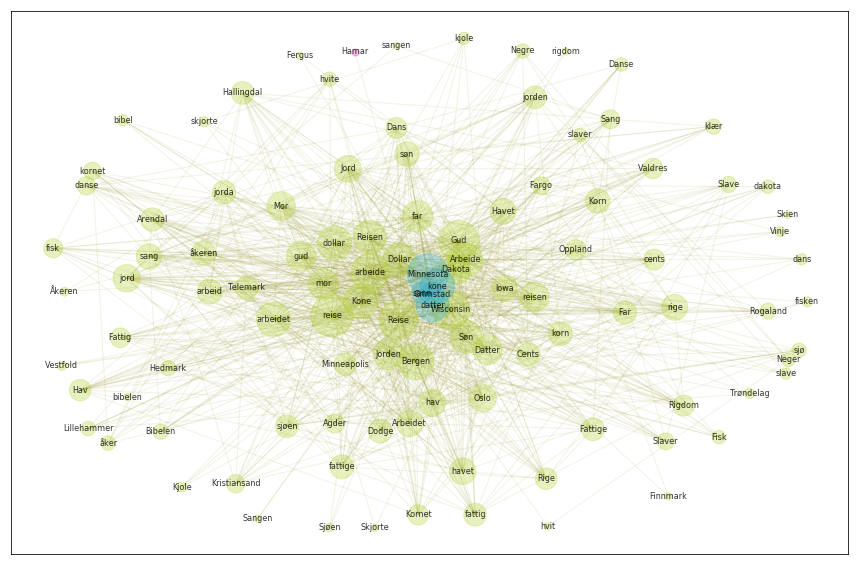

In [95]:
gnl.draw_graph_centrality2(ugraph, gnl.mcommunity(Gall), fontsize=8, k=1.9, l_alpha=0.8)

In [94]:
ugraph = nx.compose_all([G[u] for u in G])

In [91]:
G = dict()
for u in urns:
    G[u] = nb.make_network_graph(u, wordbag= test_words.split())

2007030801010  1958 Amerikabrev Aschehoug nob eng


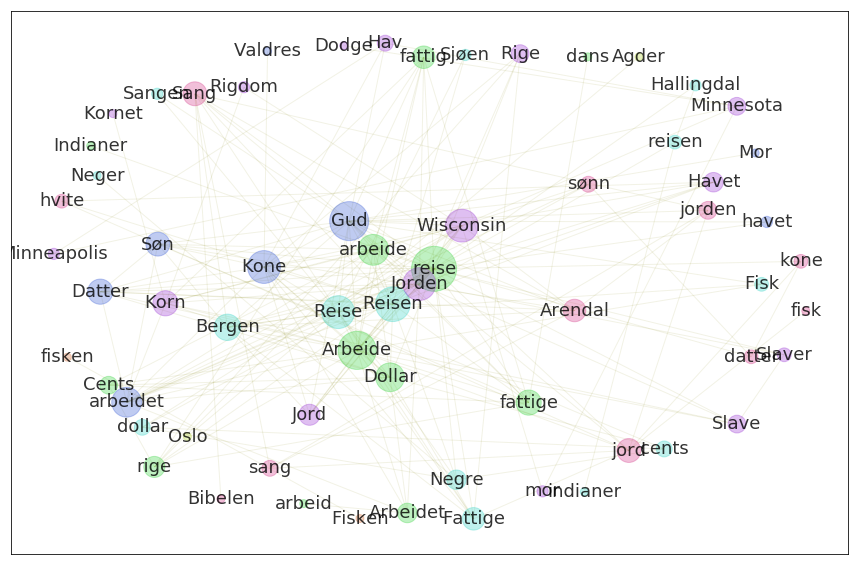

In [92]:
u = list(G.keys())[8]
ugraph = G[u]
print(' '.join([str(x) for x in nb.metadata(u)[0]]))
gnl.draw_graph_centrality2(ugraph, gnl.mcommunity(ugraph), fontsize=18, k=1.9, l_alpha=0.8, multi=4000)

In [96]:
i = 1
for s in gnl.mcommunity(ugraph):
    print(i, ' ==> ', ', '.join(s))
    i += 1

1  ==>  hvit, Korn, Skjorte, Fattige, jorda, Telemark, Åkeren, sjø, sjøen, dans, Jorden, Fisk, Slaver, arbeidet, sangen, Dollar, Dans, korn, Arendal, Kjole, Fattig, Skien, Agder, Fergus, sang, Bibelen, Danse, Fargo, Lillehammer, Reisen, Oppland, Cents, hvite, rige, Negre, Finnmark, Hedmark, Jorda, far, jord, åker, søn, fisken, cents, Sang, jorden, Reise, Minneapolis, Sangen, Kristiansand, Rigdom, åkeren, danse, skjorte, Bergen, Fisken, Dakota, rigdom, Dodge, Søn, Vinje, dakota, Mor, Bibel, Kone, Sjøen, Kornet, Gud, indianer, hav, Slave, Iowa, slave, Rogaland, bibel, Havet, klær, Datter, Hav, Rige, kornet, reise, Neger, arbeid, havet, gud, Arbeidet, Far, Vestfold, kjole, bibelen, Hallingdal, Oslo, Arbeide, Wisconsin, Indianer, negre, mor, fattige, Valdres, Jord, fattig, fisk, reisen, Trøndelag, slaver, arbeide, dollar
2  ==>  Grimstad, Sjø, kone, Minnesota, sønn, datter, kultur
3  ==>  Hamar, Lofoten


In [97]:
uclique = gnl.make_cliques_from_graph(ugraph)
for k in uclique[1]:
    print(k, ' --> ', ', '.join(uclique[1][k]))

(3, 1)  -->  Dakota, rigdom, Dodge, Minnesota, Søn, hvit, Korn, Skjorte, Fattige, jorda, Vinje, Telemark, dakota, Åkeren, sjø, Mor, sjøen, dans, Kone, Jorden, Fisk, Slaver, Sjøen, arbeidet, sangen, Kornet, Dollar, Gud, korn, Dans, hav, Arendal, Slave, sønn, Kjole, Iowa, slave, Rogaland, bibel, Fattig, Skien, Havet, klær, Datter, Agder, Hav, Fergus, sang, Bibelen, Danse, Rige, Fargo, kornet, Lillehammer, Reisen, reise, Neger, Oppland, Cents, hvite, rige, arbeid, havet, kone, gud, Arbeidet, Far, Negre, Vestfold, Finnmark, kjole, Hedmark, bibelen, far, Oslo, Hallingdal, jord, Arbeide, Wisconsin, åker, søn, fisken, mor, cents, Sang, jorden, Reise, Minneapolis, Sangen, fattige, Kristiansand, Grimstad, Valdres, Rigdom, Jord, fattig, åkeren, danse, reisen, fisk, skjorte, Trøndelag, slaver, Bergen, arbeide, dollar, datter
(4, 1)  -->  Dakota, Dodge, Minnesota, Søn, Korn, Fattige, jorda, Telemark, dakota, Åkeren, sjø, Mor, sjøen, dans, Kone, Jorden, Fisk, Slaver, Sjøen, arbeidet, Kornet, Dollar

In [98]:
uforest = gnl.forest(uclique[2])

C:\Users\larsj\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


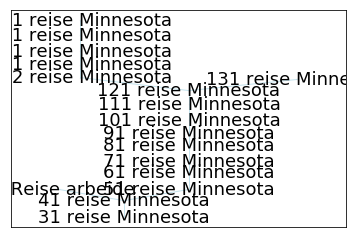

In [99]:
gnl.draw_forest(uforest, 4)

In [100]:
nb.central_betweenness_characters(ugraph, n=20)

[('Reise', 0.09432263023913383),
 ('Minnesota', 0.09274525342147508),
 ('reise', 0.0854613551605396),
 ('Gud', 0.06527589446849455),
 ('Wisconsin', 0.05034266003018766),
 ('arbeide', 0.04865287974006264),
 ('Kone', 0.036934935545215444),
 ('sønn', 0.036299473165240854),
 ('datter', 0.03334360345497314),
 ('mor', 0.030808802749628043),
 ('Bergen', 0.0286403997469257),
 ('dollar', 0.026073054621899426),
 ('reisen', 0.024602972589738314),
 ('Dollar', 0.023288402323526646),
 ('jorda', 0.022430181950317613),
 ('arbeid', 0.021956795264882818),
 ('Søn', 0.021831249188639434),
 ('hav', 0.021467335477949857),
 ('Arbeide', 0.021024864242032867),
 ('Grimstad', 0.020663385099913795)]

In [54]:
nb.get_urnkonk('svarte', {'urns':urns})

"Fra Amerika til Norge, , 1992",", med utstrakt lynsjing av",svarte,", fant sted i arbeiderstrøk"
"Amerika-brevene, Evensen, Erik Aalvik, 1996",naak over at du ikke,svarte,paa brevene som jeg skrev
"Amerikabrev, Rodegard, Olaf, 1988",viste seg at vi fikk,svarte,"flekker på lungene , så"
"Amerikabrev, Rodegard, Olaf, 1988",lager sine egne klær -,svarte,- ikke noen farger og
"Amerikabrev, Rodegard, Olaf, 1988",i gang å grave på,svarte,livet og kom ned på
"Amerikabrev, , 1958","karer ? li , vnning",svarte,med et
"Amerikabrev, , 1958",03 nap . Hele den,svarte,vinteren liadde nun nMpet mor
"Amerikabrev, , 1958",vet dveler ikke ved det,svarte,", men amerikansk sett nar"
"Amerikabrev, , 1989","dig , og til det",svarte,"jeg , at jeg ingen"
"Amerikanske breve, Kræmmer, Elias, 1909","Vine da , akkurat som",svarte,Diamanter. Hun kom ombord engang
"Amerikabrev, Johnson, Pål Espolin, 1985",vendt verdensbyen ryggen . Han,svarte,:


In [62]:
nb.get_urnkonk('svarte', {'urns':urns, 'size':50})

"Fra Amerika til Norge, , 1992",", med utstrakt lynsjing av",svarte,", fant sted i arbeiderstrøk"
"Amerika-brevene, Evensen, Erik Aalvik, 1996",naak over at du ikke,svarte,paa brevene som jeg skrev
"Amerikabrev, Rodegard, Olaf, 1988",viste seg at vi fikk,svarte,"flekker på lungene , så"
"Amerikabrev, Rodegard, Olaf, 1988",lager sine egne klær -,svarte,- ikke noen farger og
"Amerikabrev, Rodegard, Olaf, 1988",i gang å grave på,svarte,livet og kom ned på
"Amerikabrev, , 1958","karer ? li , vnning",svarte,med et
"Amerikabrev, , 1958",03 nap . Hele den,svarte,vinteren liadde nun nMpet mor
"Amerikabrev, , 1958",vet dveler ikke ved det,svarte,", men amerikansk sett nar"
"Amerikabrev, , 1989","dig , og til det",svarte,"jeg , at jeg ingen"
"Amerikanske breve, Kræmmer, Elias, 1909","Vine da , akkurat som",svarte,Diamanter. Hun kom ombord engang
"Amerikabrev, Johnson, Pål Espolin, 1985",vendt verdensbyen ryggen . Han,svarte,:


In [60]:
nb.get_urnkonk('Slaveri', {'urns':urns, 'size':50})

"Fra Amerika til Norge, , 1992",var at samenligne med et,Slaveri,", deres bedragelige Karagteer var"
"Fra Amerika til Norge, , 1992",", dersom her ikke var",Slaveri,og jeg har en bestandig
"Fra Amerika til Norge, , 1992",Amerika ' for deres hedenske,Slaveri,og uchristelige Behandling med samme
"Fra Amerika til Norge, , 1993",al thid har modsat sig,Slaveri,l ? ? ren og
"Fra Amerika til Norge, , 1993",L ? ? re om,Slaveri,""" . Chicago , 1861."
"Fra Amerika til Norge, , 1993",at Amerika er ligesom et,Slaveri,for her er ikke som
"Fra Amerika til Norge, , 1993",rt det gjemme . Om,Slaveri,", eller Rettere Sagt Tr"
"Fra Amerika til Norge, , 1993",jeg kom ut av det,Slaveri,under Kammerherren . Jeg lekker
"Amerikabrev, , 1958",boer virkelig i et sandt,Slaveri,; dig maa ethvert følende
"Amerikabrev, , 1958",Abolitionist ( ^ . nti,Slaveri,") og Lo3trvkkeren Whig ,"
